In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install HanTa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 53.9 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
read_df = pd.read_parquet('/content/drive/MyDrive/twitter_data.parquet')
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
0,2021-06-20T21:33:30.000Z,1406726930888540160,1406726930888540160,2981738470,RT @davidlohner: #IchbinHanna und schreibe auc...,7,0,0,0,"[{'type': 'retweeted', 'id': '1406714909258362...",['IchbinHanna'],retweet,de
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
2,2021-06-20T20:50:42.000Z,1406716159064485895,1406716159064485895,2981738470,RT @DrKEichhorn: Wieder ein Artikel ohne echte...,16,0,0,0,"[{'type': 'retweeted', 'id': '1406697315159752...",[],retweet,de
3,2021-06-20T17:56:03.000Z,1406672208056012807,1406672208056012807,2981738470,RT @chrismeyer2203: So sieht es aus ⬇️ oder an...,7,0,0,0,"[{'type': 'retweeted', 'id': '1406175728190865...",[],retweet,de
4,2021-06-20T17:53:00.000Z,1406671439328055301,1406671439328055301,2981738470,RT @steffen_siegel: Modelle einer Universitäts...,17,0,0,0,"[{'type': 'retweeted', 'id': '1406666454368493...",[],retweet,de


In [7]:
read_df = read_df.drop_duplicates(subset=['tweet_id'])
read_df.shape

(181552, 13)

In [8]:
read_df['tweet_language'].value_counts()

de         159811
en          18586
sv           1296
nl            345
fr            314
tl            195
cy            181
it            166
id            159
unknown       120
es             51
ja             49
fi             33
no             28
pl             28
sw             24
pt             22
af             19
et             17
ca             16
so             14
da             14
tr             11
ro             11
cs              7
ar              7
sl              6
hr              5
sk              4
vi              3
hi              2
fa              2
hu              2
th              1
sq              1
ru              1
lv              1
Name: tweet_language, dtype: int64

In [9]:
read_df = read_df.loc[read_df['tweet_type'] != 'retweet']
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
5,2021-06-20T16:17:25.000Z,1406647386542325764,1406647386542325764,2981738470,☝️⬇️ #IchbinHanna #PeerReview https://t.co/PFN...,0,0,1,0,"[{'type': 'quoted', 'id': '1406620276822061057'}]","['IchbinHanna', 'PeerReview']",original,nl
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread ⬇️ about the cruel #precarity in German...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,"Liebe @unidue und Forsa - schön, dass ihr euch...",0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread ⬇️ zu #Machtmissbrauch in der...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de


In [10]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

read_df.text = read_df.text.apply(remove_emojis)
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
5,2021-06-20T16:17:25.000Z,1406647386542325764,1406647386542325764,2981738470,#IchbinHanna #PeerReview https://t.co/PFNrovEOAS,0,0,1,0,"[{'type': 'quoted', 'id': '1406620276822061057'}]","['IchbinHanna', 'PeerReview']",original,nl
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel #precarity in German #...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,"Liebe @unidue und Forsa - schön, dass ihr euch...",0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu #Machtmissbrauch in der #...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de


In [11]:
def remove_mentions_and_tags(text): #Removing mentions and hashtags
    text = re.sub(r'@\S*', '', text)
    return re.sub(r'#\S*', '', text)

read_df.text = read_df.text.apply(remove_mentions_and_tags)

In [12]:
read_df['text'] = read_df['text'].str.replace(r'[^\w\s]+', '') #remove punctuations

<ipython-input-12-3fb73e3f27b0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  read_df['text'] = read_df['text'].str.replace(r'[^\w\s]+', '') #remove punctuations


In [13]:
read_df['text'] = read_df['text'].str.replace('\d+', '') #removes number

<ipython-input-13-0aff5bac0485>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  read_df['text'] = read_df['text'].str.replace('\d+', '') #removes number


In [ ]:
###German 

In [14]:
de_df = read_df[read_df.tweet_language == 'de']
de_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalistinnen über schreiben...,9,1,62,4,[],['IchbinHanna'],original,de
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,Liebe und Forsa schön dass ihr euch per Umfr...,0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu in der der durch die A...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de
21,2021-06-18T07:52:36.000Z,1405795569273131011,1405795569273131011,1132055796571877376,Wir können ja mal einen für machen Wer macht...,4,0,16,0,"[{'type': 'quoted', 'id': '1405617868734148610'}]","['FollowFriday', 'IchbinHanna', 'WissZeitVG', ...",original,de
22,2021-06-18T02:42:56.000Z,1405717636999155717,1405717636999155717,2981738470,Das ist übrigens ein Punkt der mir bei einfac...,1,0,6,0,"[{'type': 'quoted', 'id': '1405460325437149186'}]",['IchbinHanna'],original,de


In [ ]:
#getting nouns and adjectives
import nltk
nltk.download('punkt')
from HanTa import HanoverTagger as ht

de_tagger = ht.HanoverTagger('morphmodel_ger.pgz')

def de_noun(text):
  words = nltk.word_tokenize(text)
  tokens=[word for (word,x,pos) in de_tagger.tag_sent(words,taglevel= 1) if pos == 'NN']
  return tokens

def de_adj(text):
  words = nltk.word_tokenize(text)
  tokens=[word for (word,x,pos) in de_tagger.tag_sent(words,taglevel= 1) if pos == 'ADJ']
  return tokens

de_df['de_noun'] = de_df.text.apply(de_noun)
de_df['de_adj'] = de_df.text.apply(de_adj)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-54-107d58a0febf>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df['de_noun'] = de_df.text.apply(de_noun)
<ipython-input-54-107d58a0febf>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df['de_adj'] = de_df.text.apply(de_adj)


In [ ]:
de_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,noun_adj,de_noun,de_adj
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalistinnen über schreiben...,9,1,62,4,[],['IchbinHanna'],original,de,wirtschaftsjounalistinnen geschichten nachwuch...,"[Wirtschaftsjounalistinnen, amp, Geschichten, ...",[]
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,Liebe und Forsa schön dass ihr euch per Umfr...,0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de,liebe forsa umfrage fragen entfristung planbar...,"[Liebe, Forsa, Umfrage, Fragen, Entfristung, P...",[]
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu in der der durch die A...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de,thread arbeitsverträge,"[Thread, Arbeitsverträge]",[]
21,2021-06-18T07:52:36.000Z,1405795569273131011,1405795569273131011,1132055796571877376,Wir können ja mal einen für machen Wer macht...,4,0,16,0,"[{'type': 'quoted', 'id': '1405617868734148610'}]","['FollowFriday', 'IchbinHanna', 'WissZeitVG', ...",original,de,,[],[]
22,2021-06-18T02:42:56.000Z,1405717636999155717,1405717636999155717,2981738470,Das ist übrigens ein Punkt der mir bei einfac...,1,0,6,0,"[{'type': 'quoted', 'id': '1405460325437149186'}]",['IchbinHanna'],original,de,punkt verwertungslogik bekenntnisse ausschreib...,"[Punkt, Verwertungslogik, Bekenntnisse, Aussch...",[]


In [ ]:
de_df.de_adj.unique

<bound method Series.unique of 1         []
16        []
19        []
21        []
22        []
          ..
308278    []
308279    []
308311    []
308326    []
308332    []
Name: de_adj, Length: 42747, dtype: object>

In [ ]:
# x = de_df.noun_adj[1]
# for i in range(len(x)):
#   print (x[i])
def to_lowercase(text):
  token = []
  for i in range(len(text)):
    val = text[i].lower()
    token.append(val)
  return token

de_df.de_noun = de_df.de_noun.apply(to_lowercase)

de_df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,noun_adj,de_noun,de_adj
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalistinnen über schreiben...,9,1,62,4,[],['IchbinHanna'],original,de,w i r t s c h a f t s j o u n a l i s t i n n ...,"[wirtschaftsjounalistinnen, amp, geschichten, ...",[]
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,Liebe und Forsa schön dass ihr euch per Umfr...,0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de,l i e b e f o r s a u m f r a g e f r a ...,"[liebe, forsa, umfrage, fragen, entfristung, p...",[]
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu in der der durch die A...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de,t h r e a d a r b e i t s v e r t r ä g e,"[thread, arbeitsverträge]",[]
21,2021-06-18T07:52:36.000Z,1405795569273131011,1405795569273131011,1132055796571877376,Wir können ja mal einen für machen Wer macht...,4,0,16,0,"[{'type': 'quoted', 'id': '1405617868734148610'}]","['FollowFriday', 'IchbinHanna', 'WissZeitVG', ...",original,de,,[],[]
22,2021-06-18T02:42:56.000Z,1405717636999155717,1405717636999155717,2981738470,Das ist übrigens ein Punkt der mir bei einfac...,1,0,6,0,"[{'type': 'quoted', 'id': '1405460325437149186'}]",['IchbinHanna'],original,de,p u n k t v e r w e r t u n g s l o g i k ...,"[punkt, verwertungslogik, bekenntnisse, aussch...",[]


In [ ]:
de_df.de_adj = de_df.de_adj.apply(to_lowercase)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

german_stop_words = stopwords.words('german')
german_stop_words.append('amp')

def stop_word_de_removal(x):
    return ' '.join([w for w in x if not w in german_stop_words])

de_df.de_noun = de_df.de_noun.apply(stop_word_de_removal)
de_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,noun_adj,de_noun,de_adj
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalistinnen über schreiben...,9,1,62,4,[],['IchbinHanna'],original,de,w i r t s c h a f t s j o u n a l i s t i n n ...,wirtschaftsjounalistinnen geschichten nachwuch...,[]
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,Liebe und Forsa schön dass ihr euch per Umfr...,0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de,l i e b e f o r s a u m f r a g e f r a ...,liebe forsa umfrage fragen entfristung planbar...,[]
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu in der der durch die A...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de,t h r e a d a r b e i t s v e r t r ä g e,thread arbeitsverträge,[]
21,2021-06-18T07:52:36.000Z,1405795569273131011,1405795569273131011,1132055796571877376,Wir können ja mal einen für machen Wer macht...,4,0,16,0,"[{'type': 'quoted', 'id': '1405617868734148610'}]","['FollowFriday', 'IchbinHanna', 'WissZeitVG', ...",original,de,,,[]
22,2021-06-18T02:42:56.000Z,1405717636999155717,1405717636999155717,2981738470,Das ist übrigens ein Punkt der mir bei einfac...,1,0,6,0,"[{'type': 'quoted', 'id': '1405460325437149186'}]",['IchbinHanna'],original,de,p u n k t v e r w e r t u n g s l o g i k ...,punkt verwertungslogik bekenntnisse ausschreib...,[]


In [ ]:
de_df.de_adj = de_df.de_adj.apply(stop_word_de_removal)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
!pip install germalemma==0.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.1/22.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.3 MB/s eta 0:00:00


In [ ]:
#lemmas
from germalemma import GermaLemma
lemmatizer = GermaLemma()

def lemmatize_noun(x):
  arr = []
  token = x.split()
  for i in range(len(token)):
    lemma_noun = lemmatizer.find_lemma(token[i],'N')
    arr.append(lemma_noun)
  return arr

def lemmatize_adj(x):
  arr = []
  token = x.split()
  for i in range(len(token)):
    lemma_noun = lemmatizer.find_lemma(token[i],'ADJ')
    arr.append(lemma_noun)
  return arr

de_df['lemma_noun'] = de_df.de_noun.apply(lemmatize_noun)
de_df['lemma_adj'] = de_df.de_adj.apply(lemmatize_adj)

<ipython-input-71-29cbf7818aca>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df['lemma_noun'] = de_df.de_noun.apply(lemmatize_noun)
<ipython-input-71-29cbf7818aca>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df['lemma_adj'] = de_df.de_adj.apply(lemmatize_adj)


In [ ]:
de_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,noun_adj,de_noun,de_adj,lemma_noun,lemma_adj
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalistinnen über schreiben...,9,1,62,4,[],['IchbinHanna'],original,de,w i r t s c h a f t s j o u n a l i s t i n n ...,wirtschaftsjounalistinnen geschichten nachwuch...,,"[Wirtschaftsjounalistinnen, Geschicht, Nachwuc...",[]
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,Liebe und Forsa schön dass ihr euch per Umfr...,0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de,l i e b e f o r s a u m f r a g e f r a ...,liebe forsa umfrage fragen entfristung planbar...,,"[Liebe, Forsa, Umfrage, Fragen, Entfristung, P...",[]
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu in der der durch die A...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de,t h r e a d a r b e i t s v e r t r ä g e,thread arbeitsverträge,,"[Thread, Arbeitsvertrag]",[]
21,2021-06-18T07:52:36.000Z,1405795569273131011,1405795569273131011,1132055796571877376,Wir können ja mal einen für machen Wer macht...,4,0,16,0,"[{'type': 'quoted', 'id': '1405617868734148610'}]","['FollowFriday', 'IchbinHanna', 'WissZeitVG', ...",original,de,,,,[],[]
22,2021-06-18T02:42:56.000Z,1405717636999155717,1405717636999155717,2981738470,Das ist übrigens ein Punkt der mir bei einfac...,1,0,6,0,"[{'type': 'quoted', 'id': '1405460325437149186'}]",['IchbinHanna'],original,de,p u n k t v e r w e r t u n g s l o g i k ...,punkt verwertungslogik bekenntnisse ausschreib...,,"[Punkt, Verwertungslogik, Bekenntnis, Ausschre...",[]


German LDA

In [ ]:
def generate_tokens(tweet):
  words=[]
  for i in range(len(tweet)):
    word = tweet[i]
  # using the if condition because we introduced extra spaces during text cleaning
    if word!='':
      words.append(word)
  return words
#storing the generated tokens in a new column named 'words'
de_df['tokens'] = de_df.lemma_noun.apply(generate_tokens)

<ipython-input-74-7d53d33b0cf5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df['tokens'] = de_df.lemma_noun.apply(generate_tokens)


In [ ]:
nltk.download('omw-1.4')
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

def create_dictionary(words):
  return corpora.Dictionary(words)
#passing the dataframe column having tokens as the argument
de_id2word = create_dictionary(de_df.tokens)
print(de_id2word)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Dictionary(28201 unique tokens: ['Aktienmarkt', 'Finanzkrisehttpstcoeckyjogs', 'Geschicht', 'Mensch', 'Nachwuchses']...)


In [ ]:
def create_document_matrix(tokens, id2word):
  corpus = []
  for text in tokens:
    corpus.append(id2word.doc2bow(text))
  return corpus
#passing the dataframe column having tokens and dictionary
de_corpus = create_document_matrix(de_df.tokens, de_id2word)

In [ ]:
de_lda_model = gensim.models.ldamodel.LdaModel(corpus=de_corpus, id2word=de_id2word, num_topics=10, random_state=100)

In [ ]:
def get_lda_topics(model, num_topics, top_n_words):
     word_dict = {}
     for i in range(num_topics):
         word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in model.show_topic(i, topn = top_n_words)];
 
     return pd.DataFrame(word_dict)
get_lda_topics(de_lda_model,10,20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,Uni,Frage,Bildung,Universitäten,Thema,Dauerstelle,Jahre,Stellen,Wissenschaft,Unis
1,Fall,Hochschule,Punkt,Wissenschaft,Wissenschaft,Lehre,Jahren,Stelle,Frauen,Wissenschaft
2,Jahren,Debatte,Forschung,Stellen,Uhr,Problem,Perspektive,Wissenschaftler,Seite,Arbeitsbedingung
3,Job,Dauerstelle,Gespräch,Frau,Beispiel,Forschung,Menschen,Jahre,Wochen,Arbeit
4,Monate,System,Wisszeitvg,Wissenschaftlerinnen,Arbeit,Daueraufgabe,Wissenschaft,Professur,Teil,Dank
5,Arbeitsvertrag,Diskussion,Meinung,Vorschlag,Gesellschaft,Tag,Wirtschaft,Situation,Forschung,Hochschule
6,Verträge,Jobs,Stunden,Befristungen,Arbeitsbedingung,Welt,Uni,Unis,Buch,Artikel
7,Fragen,Doktorvater,Solidarität,Zb,Leben,Hochschule,Promotion,Drittmittel,Zeit,Woche
8,Dinge,Track,Förderung,System,Perspektiven,Stellen,System,Dauerstelle,Ahnung,Bedingungen
9,Forschung,Wisszeitvg,Probleme,Nachwuchs,Beitrag,Bundestag,Zeit,Promotion,Strukturen,Anschlussverwendung


Clustering for LDA

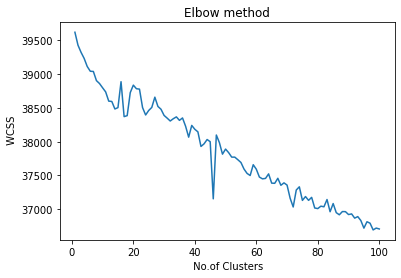

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(de_df.de_noun)
wcss = []
for i in range(1,101):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,101),wcss)
plt.title('Elbow method')
plt.xlabel(' No.of Clusters')
plt.ylabel(' WCSS')
plt.show()

In [ ]:
#final cluster
clusters = KMeans(n_clusters = 45, init='k-means++', random_state=42)
clusters.fit(X)

KMeans(n_clusters=45, random_state=42)

In [ ]:
print("Top terms per cluster:")
order_centroids = clusters.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(45):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :5]:
        print (' %s' % terms[ind],)
    print

In [ ]:
final = []
for i in range(45):
  inner = []
  for j in order_centroids[i, ]:
    x = '%s' % terms[j]
    if (len(x) >2):  #removing single and double letters 
      inner.append(x)
  final.append(inner)


LDA on each clusters DE

In [ ]:
for i in range(2):
  print(final[i])

['vernichtung', 'ticket', 'werte', 'partei', 'karrieren', 'macht', 'gestalt', 'gespäch', 'gesprächsverweigerung', 'şahinoder', 'gesprächsthema', 'gestaltugsräumen', 'gesprächstermin', 'gesprächsrunden', 'gesprächsrunde', 'gesprächspunkt', 'gestalten', 'gestaltungen', 'gestaltung', 'gesprächspartner', 'gestaltungschance', 'gestaltungsfreiheit', 'gestaltungsfreiheiten', 'gestaltungsmacht', 'gestaltungsmöglichkeiten', 'gestaltungspotential', 'gestaltungsräume', 'gestaltungsspielraum', 'gestaltungsspielräume', 'gestaltungswillen', 'gestaltungvorschlag', 'gesprächspartnerinnen', 'gesprächsfäden', 'gesprächskreise', 'gesinde', 'gesetzgebungshistorie', 'gesetzgebungskompetenz', 'gesetzgebungsprozess', 'gesetzgebungsverfahren', 'gesetzmässigkeit', 'gesicht', 'gesichter', 'gesichtsausdruck', 'gesichtsbedrohungen', 'gesichtscreme', 'gesichtspunkt', 'gesichtspunkten', 'gesine', 'gestein', 'gesinnung', 'gespräch', 'gespräche', 'gesprächen', 'gesprächs', 'gesprächsabend', 'gesprächsangebot', 'gespr

In [ ]:
ijk = []
for i in range(45):
    de_cluster_dict = {"cluster": []}
    de_cluster_dict['cluster'] = final[i]
    ijk.append(de_cluster_dict)

In [ ]:
for i in range(2):
  print(ijk[i])

{'cluster': ['vernichtung', 'ticket', 'werte', 'partei', 'karrieren', 'macht', 'gestalt', 'gespäch', 'gesprächsverweigerung', 'şahinoder', 'gesprächsthema', 'gestaltugsräumen', 'gesprächstermin', 'gesprächsrunden', 'gesprächsrunde', 'gesprächspunkt', 'gestalten', 'gestaltungen', 'gestaltung', 'gesprächspartner', 'gestaltungschance', 'gestaltungsfreiheit', 'gestaltungsfreiheiten', 'gestaltungsmacht', 'gestaltungsmöglichkeiten', 'gestaltungspotential', 'gestaltungsräume', 'gestaltungsspielraum', 'gestaltungsspielräume', 'gestaltungswillen', 'gestaltungvorschlag', 'gesprächspartnerinnen', 'gesprächsfäden', 'gesprächskreise', 'gesinde', 'gesetzgebungshistorie', 'gesetzgebungskompetenz', 'gesetzgebungsprozess', 'gesetzgebungsverfahren', 'gesetzmässigkeit', 'gesicht', 'gesichter', 'gesichtsausdruck', 'gesichtsbedrohungen', 'gesichtscreme', 'gesichtspunkt', 'gesichtspunkten', 'gesine', 'gestein', 'gesinnung', 'gespräch', 'gespräche', 'gesprächen', 'gesprächs', 'gesprächsabend', 'gesprächsange

In [ ]:
de_cluster_df = pd.json_normalize(ijk)
de_cluster_df.head()

,cluster
0,"[vernichtung, ticket, werte, partei, karrieren..."
1,"[jahre, uni, zeit, stellen, hochschulen, arbei..."
2,"[mailingliste, telegramgruppe, aktionen, treff..."
3,"[patronage, mär, kriterium, berufungen, drittm..."
4,"[daueraufgaben, dauerstellen, wissenschaft, le..."


In [ ]:
def cluster_create_dictionary(words):
  return corpora.Dictionary(words)
#passing the dataframe column having tokens as the argument
cluster_de_id2word = create_dictionary(de_cluster_df.cluster)
print(cluster_de_id2word)

Dictionary(30062 unique tokens: ['aaaber', 'aaber', 'aba', 'abauauszahlung', 'abauf']...)


In [ ]:
def cluster_create_document_matrix(tokens, id2word):
  corpus = []
  for text in tokens:
    corpus.append(id2word.doc2bow(text))
  return corpus
#passing the dataframe column having tokens and dictionary
cluster_de_corpus = cluster_create_document_matrix(de_cluster_df.cluster, cluster_de_id2word)

In [ ]:
cluster_de_lda_model = gensim.models.ldamodel.LdaModel(corpus=cluster_de_corpus, id2word=cluster_de_id2word, num_topics=10, random_state=100)

In [ ]:
def get_lda_topics(model, num_topics, top_n_words):
     word_dict = {}
     for i in range(num_topics):
         word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in model.show_topic(i, topn = top_n_words)];
 
     return pd.DataFrame(word_dict)
get_lda_topics(cluster_de_lda_model,10,20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,lehrreduktion,drittmittelerfahrung,dekanenrunde,hängen,mentorings,wissenschaftscomic,gerichtsprozesse,gewissheit,ratschläge,gegenzug
1,propheten,hochulpräsident,quantenphysiker,bildungsbürgertum,transparente,qualifizierung,innovationskanäle,kegel,stip,pseudoargument
2,führungskompetenz,hochschulverträge,königsweg,texten,bundesverfassungsgericht,staatwissenschaft,helmholtzbeteiligung,weltklimaratssitzung,solidarisierung,genu
3,ideal,beitrags,dreistigkeit,traueranzeige,destruktion,ratstellen,seiteich,treiber,unf,zertifikat
4,auswahlkriterium,joblotterie,beispielrechnung,erhörungsverfahren,verlagswesen,bestürzung,parteivertreterinnen,hauptverantwortung,drittmittelwesen,reizwörter
5,ablenkungsversuche,fronarbeit,lernform,fachdiskurs,betreuungsaufwand,risiken,feldes,staatsbildung,winterluft,geschäftsmodell
6,stellenbefristungen,monatspauschale,rechercheaufträge,servicegesellschaft,gymnasiallehrerin,lesart,altersgruppe,konkurrenzkämpfe,phänomenen,qualitätsentwicklung
7,hspolitik,osterlektüre,hasse,lecturerstelle,umzügearbeitsortwechsel,händchen,studierendenbetreuung,nutzung,sozialvers,exklusivzeit
8,quantifizierung,twitterumfragen,schmankerl,ppt,impfstrategie,mamba,organisierungsprozess,maske,wahlbrief,einführungen
9,abschiede,verwertungsdruck,aufenthaltserlaubnis,internetauftritten,habilitand_innen,pflichtprogramm,akronym,drittmittelstreik,industrien,bandscheibenvorfälle


Cluster's LDA

In [ ]:
for i in range(45):
  clust_id2_word = create_dictionary([final[i]])
  clust_corpus = cluster_create_document_matrix([final[i]], clust_id2_word)
  clust_lda_model = gensim.models.ldamodel.LdaModel(corpus=clust_corpus, id2word=clust_id2_word, num_topics=10, random_state=100)
  print("Cluster", i+1," :")
  print(get_lda_topics(clust_lda_model,10,10))
  print("************************************ \n")

Cluster 1  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              tr

Cluster 2  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              tr

Cluster 3  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              tr

Cluster 4  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              tr

Cluster 5  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              tr

Cluster 6  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              tr

Cluster 7  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              tr

Cluster 8  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              tr

Cluster 9  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              tr

Cluster 10  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 11  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 12  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 13  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 14  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 15  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 16  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 17  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 19  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 21  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 22  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 24  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 25  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 26  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 28  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 29  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 31  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 33  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 34  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 35  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 36  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 38  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 39  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 41  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 42  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 43  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

Cluster 45  :
            Topic # 01                 Topic # 02         Topic # 03  \
0        lehrreduktion       drittmittelerfahrung       dekanenrunde   
1            propheten            hochulpräsident    quantenphysiker   
2    führungskompetenz          hochschulverträge       dreistigkeit   
3                ideal                   beitrags          königsweg   
4     auswahlkriterium                 fronarbeit              hasse   
5   ablenkungsversuche            monatspauschale           lernform   
6            hspolitik                joblotterie   beispielrechnung   
7  stellenbefristungen            twitterumfragen  rechercheaufträge   
8      quantifizierung               osterlektüre         schmankerl   
9            abschiede  dauerbewährungsbefristung   httpstcoylmiksel   

                Topic # 04                Topic # 05          Topic # 06  \
0                   hängen                mentorings  wissenschaftscomic   
1        bildungsbürgertum              t

BiTerm model for german text

In [ ]:
!pip install bitermplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.1/615.1 KB 13.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bitermplus: filename=bitermplus-0.6.12-cp38-cp38-linux_x86_64.whl size=1330510 sha256=27c50e3d2a04a5eae8f1fc7134ee2f24904dffd4ed69a6ec855376821004a442
  Stored in directory: /root/.cache/pip/wheels/c4/f8/be/52cc190012530001ba15fe9f5f05785623f964940b2f1550c5
Successfully built bitermplus


In [ ]:
import bitermplus as btm

# tweet_text_btm = new_df['text'].str.strip().tolist()
tweet_text_btm = final[0]
X, vocabulary, vocab_dict = btm.get_words_freqs(tweet_text_btm)
tf = np.array(X.sum(axis=0)).ravel()

docs_vec = btm.get_vectorized_docs(tweet_text_btm, vocabulary)
docs_lens = list(map(len, docs_vec))

biterms = btm.get_biterms(docs_vec)

model = btm.BTM(X, vocabulary, seed=12321, T=10, M=20, alpha=50/8, beta=0.01)
model.fit(biterms, iterations=20)
p_zd = model.transform(docs_vec)

AxisError: ignored